In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from classes import Word2VecModel

from functions import *
model_w2v_settings = return_best_model()

model_w2v = Word2VecModel(model_w2v_settings)

# read preprocessed data from pickle file
df = pd.read_pickle('data/preprocessed_titles_labels.pkl')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adammajczyk/nltk_data..

,title,is_clickbait,text,dataset,sample
0,"[seventeen, time, game, throne, matched, perfe...",1,NaN,clickbait-dataset,train
1,"[facing, texas, tar, heel, territory, duke, fi...",0,NaN,clickbait-dataset,train
2,"[several, gop, state, move, block, funding, sa...",0,A number of GOP states have moved to introduce...,clickbait-news-detection,train
3,"[hillary, clinton, john, kerry, divergent, pat...",0,"WASHINGTON — Early in 2011, after a hectic ...",fake-news,train
4,"[wikinews, interview, kevin, baugh, president,...",0,NaN,clickbait-dataset,train


In [2]:
# split data into train and test stratified by y
import os
import pickle

df['title_vector'] = [get_word_vectors(model_w2v, title, aggregation='mean') for title in df['title']]

X_train = np.vstack(df[df['sample']=='train']['title_vector'])
X_test = np.vstack(df[df['sample']=='val2']['title_vector'])



y_train = df[df['sample']=='train']['is_clickbait']
y_test = df[df['sample']=='val2']['is_clickbait']


# read scaler from file
with open('predictive_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'dim_{i}' for i in range(X_train_scaled.shape[1])])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f'dim_{i}' for i in range(X_test_scaled.shape[1])])

In [4]:
X_train_scaled_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-0.645392,-0.340966,-0.753851,1.993597,1.161664,0.367683,-0.746235,-0.990738,-1.028398,-0.652214,-1.481824,-0.249499,-0.135534,0.520407,2.479815,0.388923,-0.708477,-0.322252,-1.039755,0.688557
1,0.374572,-0.626801,-0.519147,-0.194350,0.536831,-0.767424,0.826722,0.381843,0.298561,0.288451,0.516023,-0.030166,0.445552,0.555461,-1.000573,-1.221409,0.315424,0.593505,-0.317750,0.343607
2,0.398552,0.734541,0.017666,-0.967212,0.371111,-0.953426,0.174181,-0.212344,0.564138,1.974203,-0.029004,0.249492,1.083400,-0.470811,-0.164064,-0.998595,0.585140,-0.192513,-0.091475,0.012187
3,0.037695,0.229172,-0.646375,-0.319392,0.506403,-0.301752,-1.811126,0.683084,0.561808,-0.708791,-0.189831,0.804662,-0.504264,-0.062416,0.214318,-0.586815,0.351298,-0.530151,0.179082,0.255797
4,2.610592,-0.296601,-2.165756,-2.422164,3.010185,0.556036,0.089667,-0.274755,-3.189490,-0.046223,2.759348,-0.098161,-0.231978,-0.426449,1.940591,0.581623,-0.175155,0.152058,-0.410785,0.782901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66659,0.666278,-0.535590,0.422052,0.588525,0.788257,-0.036724,-0.891393,-0.889144,-0.087236,0.073559,-0.600048,0.983065,1.017225,-0.011186,0.329960,-0.366568,-0.315733,0.149189,-0.534750,-0.513268
66660,1.694192,2.945695,-2.221144,-0.474866,2.320635,-1.096984,-1.442080,0.654933,0.774813,-1.327892,0.859403,0.014299,-0.093475,-0.448645,-0.616117,0.412903,2.778738,0.454517,-0.542559,-0.081007
66661,-0.744122,-0.919766,0.194229,1.363538,-1.292786,1.128494,-1.123285,-0.289519,-0.013208,-0.173970,-0.683913,-0.383336,0.127722,0.895645,0.353595,-0.131274,-0.446469,0.517177,0.328410,0.120143
66662,0.566671,0.820496,0.116473,-0.847489,0.458298,0.009836,-0.496769,0.509025,0.699132,1.060382,-0.010169,-0.921987,-0.838697,0.018515,-0.225931,-0.237845,-1.366336,-0.469632,0.671402,0.081733


In [5]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

def return_model_with_param(model_name, param = dict()):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier(**param)
    elif model_name == 'random_forest':
        model = RandomForestClassifier(**param)
    elif model_name == 'xgboost':
        model = XGBClassifier(**param)
    elif model_name == 'lightgbm':
        model = LGBMClassifier(**param, verbose=-1)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**param, verbose=0)
    return model

In [6]:
# train LightGBM model for each dimension


from sklearn.metrics import roc_auc_score, f1_score
from tqdm.notebook import tqdm



result_dict = {}
model_names = ['lightgbm', 'decision_tree',   'xgboost', 'random_forest','catboost',]
for name in model_names:
    result_dict[name] = dict()


for name in tqdm(model_names):
    for dim in tqdm(X_train_scaled_df.columns):
        model = return_model_with_param(name)
        model.fit(X_train_scaled_df[dim].values.reshape(-1,1), y_train)

        # calculate auc, f1
        y_pred_proba = model.predict_proba(X_test_scaled_df[dim].values.reshape(-1,1))[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)

        y_pred = model.predict(X_test_scaled_df[dim].values.reshape(-1,1))
        f1 = f1_score(y_test, y_pred)
        result_dict[name][dim] = {'auc': auc, 'f1': f1}
    model.fit(X_train_scaled_df, y_train)
    result_dict[name]['feature_importance'] = model.feature_importances_
result_df = pd.DataFrame(result_dict).T






  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/lightgbm/basic.py:506: UserWarning: Usage of n

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
result_df['feature_importance_mean'] = result_df['feature_importance'].apply(lambda x: np.mean(x))
result_df['feature_importance_std'] = result_df['feature_importance'].apply(lambda x: np.std(x))

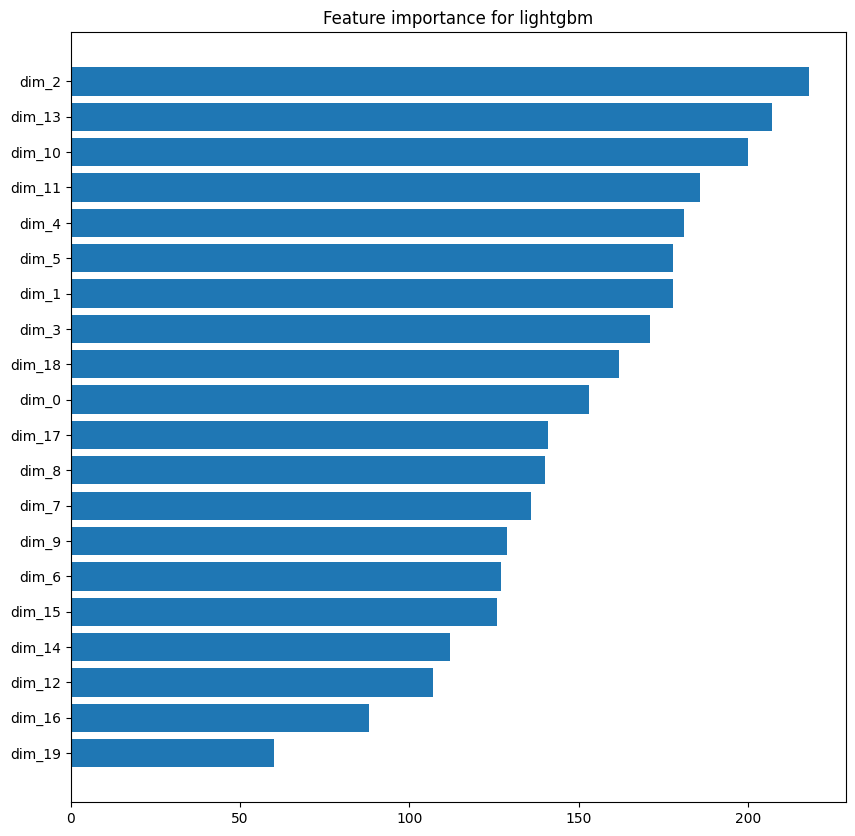

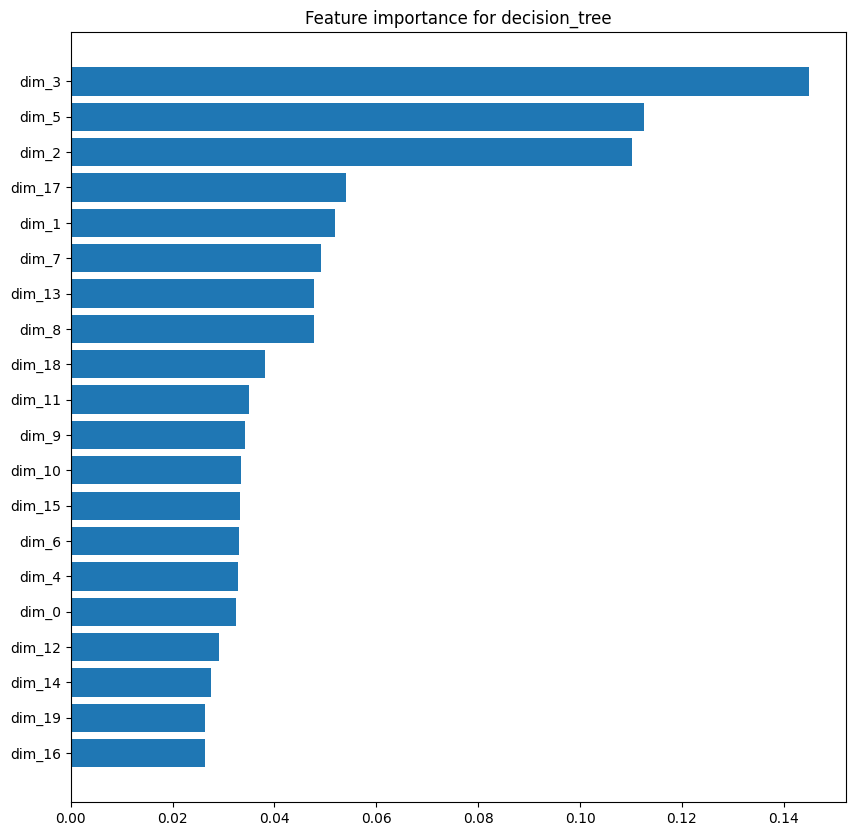

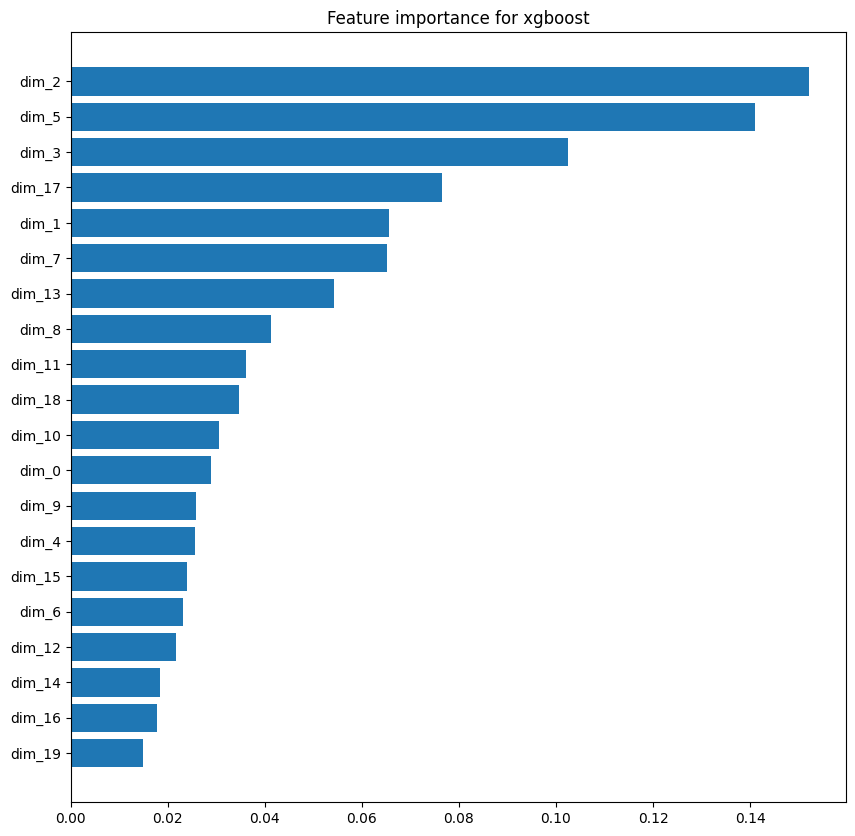

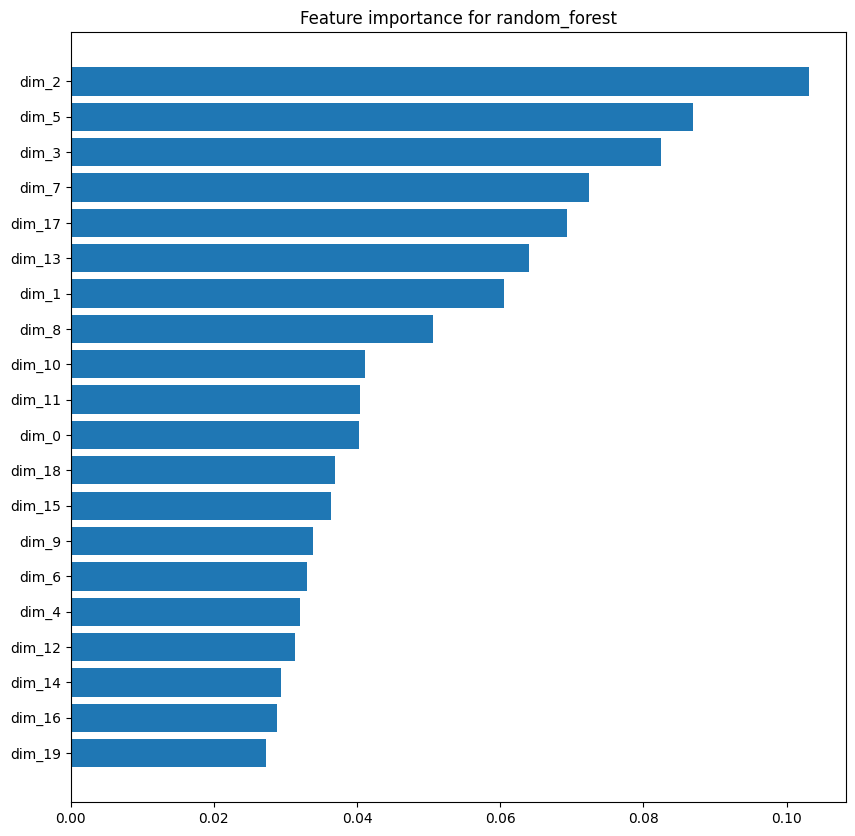

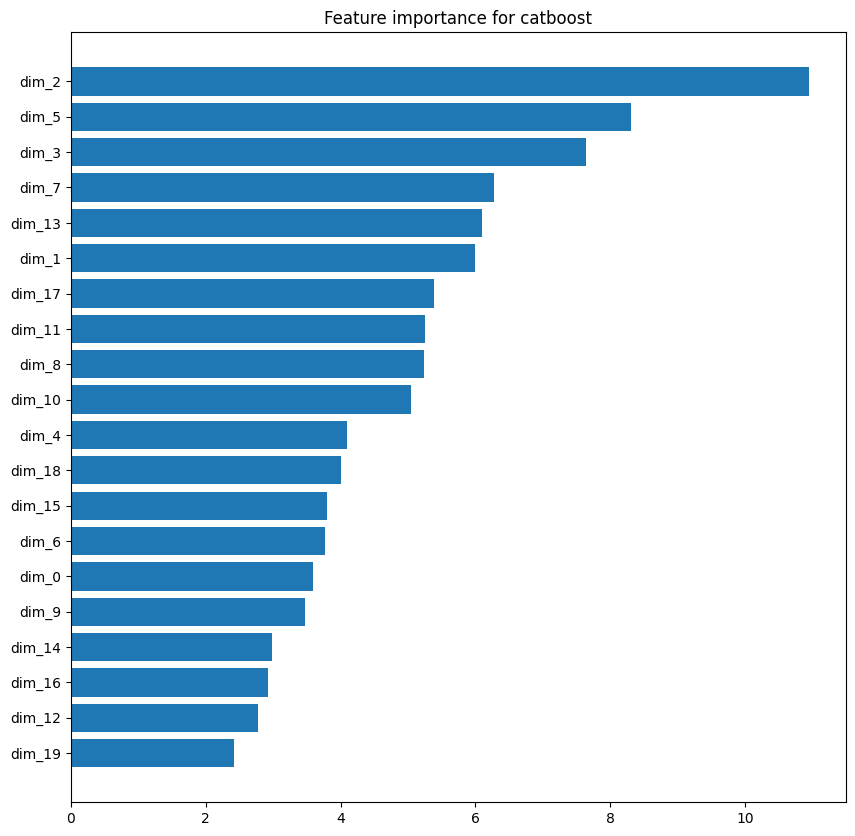

In [ ]:
import matplotlib.pyplot as plt
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    
    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importance)
    plt.title(f'Feature importance for {name}')


In [ ]:
# get 10 worst performing dimensions for each model based on feature importance
worst_performing_dimensions = dict()
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    worst_performing_dimensions[name] = sorted_features[:10]
worst_performing_dimensions

{'lightgbm': Index(['dim_19', 'dim_16', 'dim_12', 'dim_14', 'dim_15', 'dim_6', 'dim_9',
        'dim_7', 'dim_8', 'dim_17'],
       dtype='object'),
 'decision_tree': Index(['dim_16', 'dim_19', 'dim_14', 'dim_12', 'dim_0', 'dim_4', 'dim_6',
        'dim_15', 'dim_10', 'dim_9'],
       dtype='object'),
 'xgboost': Index(['dim_19', 'dim_16', 'dim_14', 'dim_12', 'dim_6', 'dim_15', 'dim_4',
        'dim_9', 'dim_0', 'dim_10'],
       dtype='object'),
 'random_forest': Index(['dim_19', 'dim_16', 'dim_14', 'dim_12', 'dim_4', 'dim_6', 'dim_9',
        'dim_15', 'dim_18', 'dim_0'],
       dtype='object'),
 'catboost': Index(['dim_19', 'dim_12', 'dim_16', 'dim_14', 'dim_9', 'dim_0', 'dim_6',
        'dim_15', 'dim_18', 'dim_4'],
       dtype='object')}

In [ ]:
# get intersection of worst performing dimensions
worst_performing_dimensions_intersection = set(worst_performing_dimensions['lightgbm']).intersection(set(worst_performing_dimensions['decision_tree']), set(worst_performing_dimensions['xgboost']), set(worst_performing_dimensions['random_forest']), set(worst_performing_dimensions['catboost']))
worst_performing_dimensions_intersection

{'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_19', 'dim_6', 'dim_9'}

In [ ]:
# save which dimensions to remove to file
with open('predictive_models/worst_performing_dimensions_intersection.pkl', 'wb') as f:
    pickle.dump(worst_performing_dimensions_intersection, f)

Text(0, 0.5, 'Prawdopodobieństwo [0, 1]')

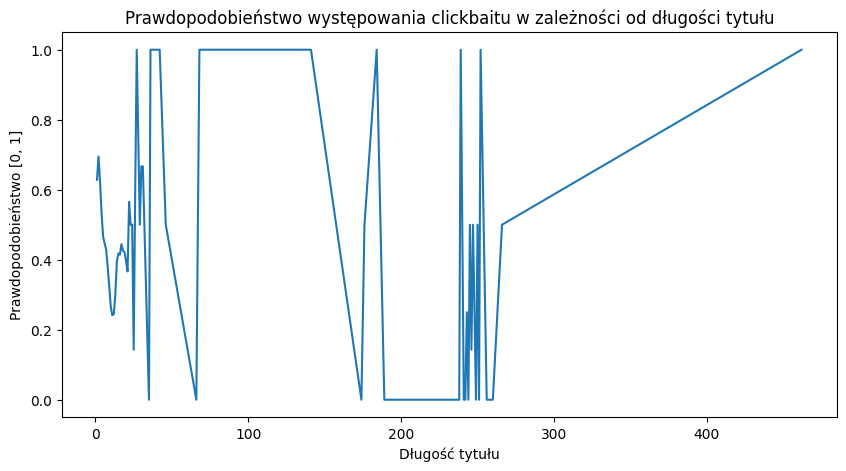

In [ ]:
# do we want title length as a feature?
df['title_length'] = df['title'].apply(lambda x: len(x))

df.groupby('title_length')['is_clickbait'].mean().plot( figsize=(10, 5))
plt.title('Prawdopodobieństwo występowania clickbaitu w zależności od długości tytułu')
plt.xlabel('Długość tytułu')
plt.ylabel('Prawdopodobieństwo [0, 1]')